## Loading Apple dataset


In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn import preprocessing
import matplotlib.patches as patches
from statsmodels.tsa.stattools import adfuller

In [11]:
# read the apple stock data

df = pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Volume
0,1/3/2006,6.999730,7.228929,6.987158,7.228929,201808600
1,1/4/2006,7.265678,7.347880,7.204753,7.250205,154900900
2,1/5/2006,7.236664,7.243433,7.132219,7.193145,112355600
3,1/6/2006,7.277282,7.417508,7.209586,7.378825,176114400
4,1/9/2006,7.420411,7.465863,7.324670,7.354649,168760200
...,...,...,...,...,...,...
3100,4/27/2018,164.000000,164.330002,160.630005,162.320007,35655800
3101,4/30/2018,162.130005,167.259995,161.839996,165.259995,42427400
3102,5/1/2018,166.410004,169.199997,165.270004,169.100006,53569400
3103,5/2/2018,175.229996,177.750000,173.800003,176.570007,66539400


In [4]:
# checking null values

print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 6 columns):
Date      3105 non-null object
Open      3105 non-null float64
High      3105 non-null float64
Low       3105 non-null float64
Close     3105 non-null float64
Volume    3105 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 145.7+ KB


In [322]:
df_aapl = df.set_index("Date")
df_aapl

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2006,6.999730,7.228929,6.987158,7.228929,201808600
1/4/2006,7.265678,7.347880,7.204753,7.250205,154900900
1/5/2006,7.236664,7.243433,7.132219,7.193145,112355600
1/6/2006,7.277282,7.417508,7.209586,7.378825,176114400
1/9/2006,7.420411,7.465863,7.324670,7.354649,168760200
...,...,...,...,...,...
4/27/2018,164.000000,164.330002,160.630005,162.320007,35655800
4/30/2018,162.130005,167.259995,161.839996,165.259995,42427400
5/1/2018,166.410004,169.199997,165.270004,169.100006,53569400


[]

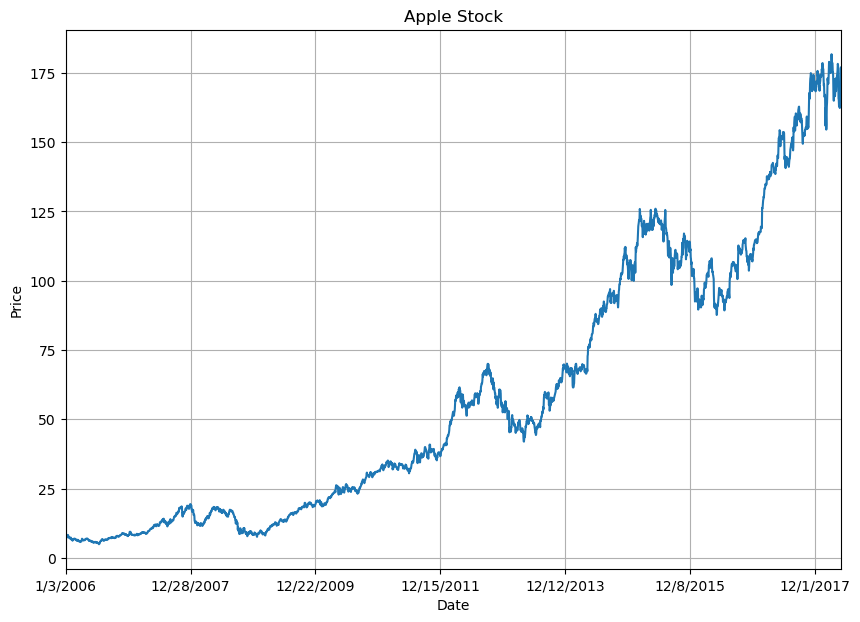

In [323]:
df_aapl["Close"].plot(figsize=(10,7))
plt.title("Apple Stock")
plt.ylabel("Price")
plt.grid(True)
plt.plot()

## Additional Features

### MA - Moving Average
It is a used to analyze data points by creating a series of averages of different subsets of full data set. It smooths out price trends by filtering out the noise from random short-term price fluctuations.

In [324]:
df_aapl["MA20"] = df_aapl.Close.rolling(window=20).mean()

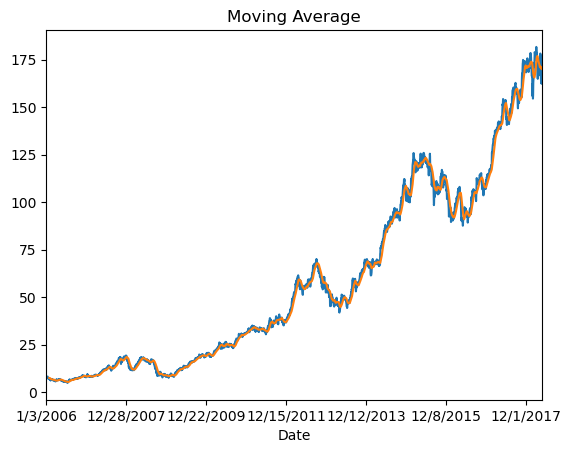

In [325]:
df_aapl.Close.plot()
df_aapl.MA20.plot()
plt.title("Moving Average")
plt.show()

### SMA
Simple Moving Average

In [326]:
df_aapl["SMA5"]  = df_aapl.Close.rolling(window=5).mean()
df_aapl["SMA10"] = df_aapl.Close.rolling(window=10).mean()
df_aapl["SMA50"] = df_aapl.Close.rolling(window=50).mean()
df_aapl["SMA100"] = df_aapl.Close.rolling(window=100).mean()
df_aapl["SMA500"] = df_aapl.Close.rolling(window=500).mean()

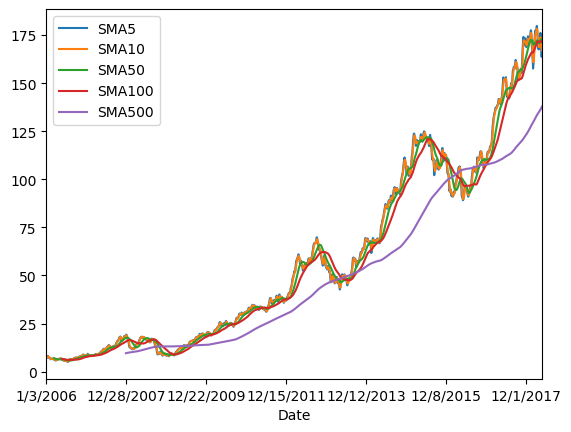

In [327]:
df_aapl[["SMA5","SMA10","SMA50","SMA100","SMA500"]].plot()
plt.show()

### EMA:
Exponential Moving Average

In [328]:
df_aapl["EMA10"] = df_aapl.Close.ewm(span=10, adjust=False).mean()
df_aapl["EMA50"] = df_aapl.Close.ewm(span=50, adjust=False).mean()
df_aapl["EMA100"] = df_aapl.Close.ewm(span=100, adjust=False).mean()

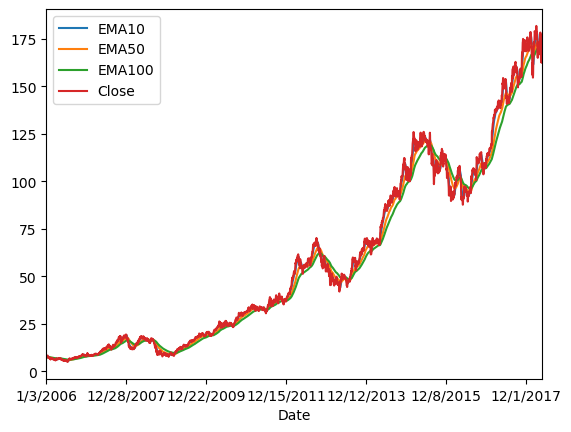

In [329]:
df_aapl[["EMA10","EMA50","EMA100","Close"]].plot()
plt.show()

### ROC : 
ROC measures the percentage change in price between the current price and the price a certain number of periods ago.

In [330]:
df_aapl["ROC"] = ( (df_aapl["Close"] - df_aapl["Close"].shift(10)) / df_aapl["Close"].shift(10)) *100

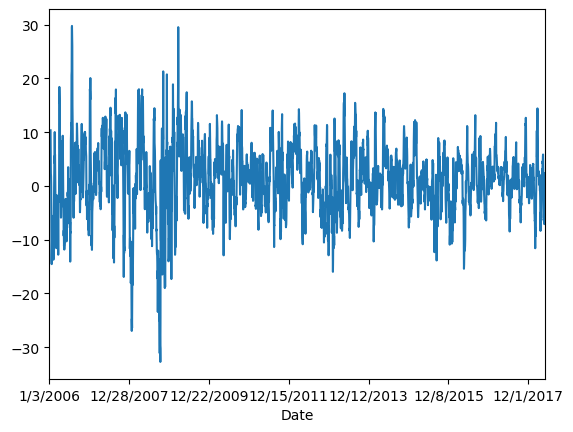

In [331]:
df_aapl.ROC.plot()
plt.show()

In [332]:
q = df_aapl.Close.diff(1)
q[q>0]

Date
1/4/2006     0.021276
1/6/2006     0.185680
1/10/2006    0.465167
1/11/2006    0.293991
1/12/2006    0.037718
               ...   
4/26/2018    0.570007
4/30/2018    2.939988
5/1/2018     3.840011
5/2/2018     7.470001
5/3/2018     0.319992
Name: Close, Length: 1624, dtype: float64

### RSI
RSI compares the size of recent gains to recent losses, it is intended to reveal the strength or weakness of a price trend from a range of closing prices over a time period.

In [333]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)
    
    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [334]:
computeRSI(df_aapl.Close,10)

Date
1/4/2006           NaN
1/5/2006           NaN
1/6/2006           NaN
1/9/2006           NaN
1/10/2006          NaN
               ...    
4/27/2018    32.470406
4/30/2018    41.614819
5/1/2018     51.204163
5/2/2018     63.988390
5/3/2018     64.431925
Name: Close, Length: 3104, dtype: float64

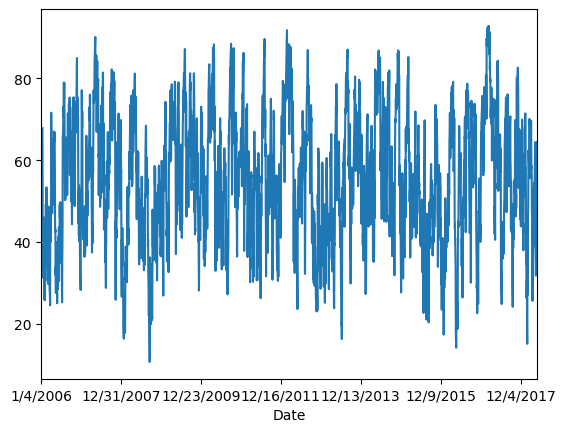

In [335]:
computeRSI(df_aapl.Close,10).plot()
plt.show()

### perK

In [336]:
C = df_aapl.Close.diff(1)
L14 = df_aapl.High.rolling(window=14).max()
H14 = df_aapl.Low.rolling(window=14).min()

df_aapl["percK"] = 100*(C - L14) / (H14 -L14)
df_aapl.tail(10)

,Open,High,Low,Close,Volume,MA20,SMA5,SMA10,SMA50,SMA100,SMA500,EMA10,EMA50,EMA100,ROC,percK
Date,,,,,,,,,,,,,,,,
4/20/2018,170.600006,171.220001,165.429993,165.720001,65491100,171.160000,174.084002,173.503001,172.489601,171.773788,136.595238,172.665680,172.215588,170.247956,-1.579762,1312.773679
4/23/2018,166.830002,166.919998,164.089996,165.240005,36515500,171.175001,171.968002,173.022001,172.704001,171.692357,136.737112,171.315557,171.942036,170.148788,-2.828579,1208.214987
4/24/2018,165.669998,166.330002,161.220001,162.940002,33692000,170.683501,168.908001,171.991002,172.834601,171.598085,136.880151,169.792729,171.589015,170.006040,-5.950937,1022.799068
4/25/2018,162.619995,165.419998,162.410004,163.649994,28382100,170.449000,166.070001,171.112001,172.853401,171.546667,137.026712,168.675868,171.277681,169.880178,-5.097430,1005.812641
4/26/2018,164.119995,165.729996,163.369995,164.220001,27963000,170.336001,164.354001,170.120001,172.851001,171.477345,137.174605,167.865710,171.000909,169.768095,-5.696565,1006.602624
4/27/2018,164.000000,164.330002,160.630005,162.320007,35655800,170.063001,163.674002,168.879002,172.750001,171.396991,137.315729,166.857401,170.660482,169.620608,-7.102380,987.657158
4/30/2018,162.130005,167.259995,161.839996,165.259995,42427400,169.992001,163.678000,167.823001,172.595401,171.358485,137.464642,166.566963,170.448698,169.534260,-6.006149,961.223609
5/1/2018,166.410004,169.199997,165.270004,169.100006,53569400,170.027502,164.910001,166.909001,172.528801,171.359974,137.621972,167.027516,170.395808,169.525660,-5.127917,956.308136
5/2/2018,175.229996,177.750000,173.800003,176.570007,66539400,170.275502,167.494003,166.782002,172.623201,171.442437,137.795251,168.762515,170.637934,169.665152,-0.714119,936.482955


C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\plo

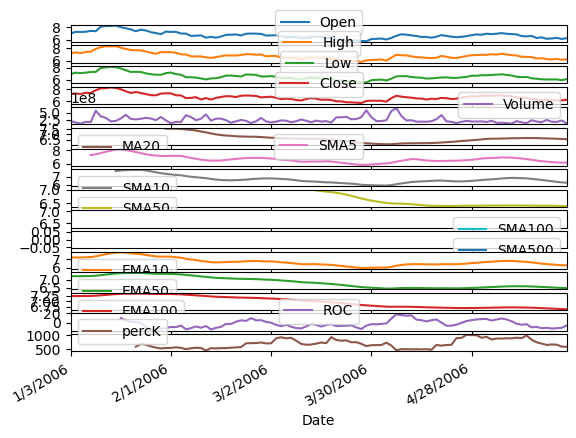

In [337]:
df_aapl.iloc[:100].plot.line(subplots=True)
plt.show()

## Stationarity Test

In [338]:
df_test = adfuller(df_aapl.Close, autolag='AIC')
print(f"ADF Value = {df_test[0]}")
print(f"P Value = {df_test[1]}")
for key,value in df_test[4].items():
    print("Critical Value")
    print(f" {key}, {value}")

ADF Value = 1.4278567202316303
P Value = 0.9972370881580075
Critical Value
 1%, -3.432477687087865
Critical Value
 5%, -2.8624800782492534
Critical Value
 10%, -2.5672704269177373


#### P-Value is greater than the significance value 0.05 hence we can reject the null hypothesis, so the trend is non-staionary

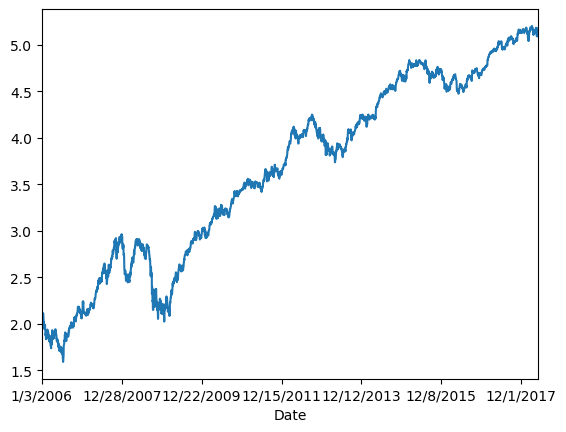

In [340]:
# trying to make it stationary using Log
np.log(df_aapl.Close).plot()

## ELM 

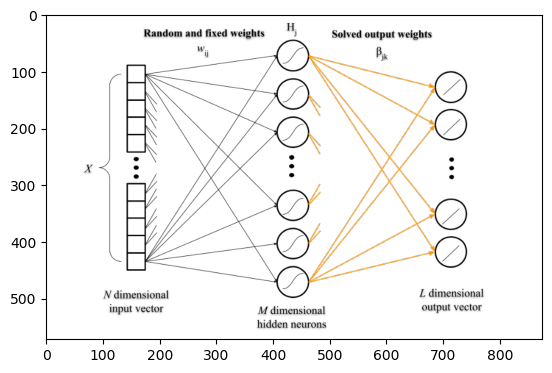

<Figure size 3000x2000 with 0 Axes>

In [285]:
#display the image

img = Image.open("elm.png")
plt.imshow(img)
plt.figure(figsize=(30,20))
plt.show()

In [298]:
# new data

df_elm = df.set_index("Date")
df_elm.drop(["Open","High","Low","Volume"],axis=1,inplace=True)

In [299]:
# Min Max scalar
df_elm = np.reshape(df_elm.values, (len(df_elm),1)) 

scaler = MinMaxScaler(feature_range=(0, 1))
norm_close = scaler.fit_transform(df_elm)
df_elm = pd.DataFrame(norm_close)
df_elm.columns = ["Close"]
df_elm

,Close
0,0.013170
1,0.013290
2,0.012968
3,0.014018
4,0.013881
...,...
3100,0.890284
3101,0.906911
3102,0.928628
3103,0.970874


In [300]:
df_elm["Close_t-1"] = df_elm.Close.shift(periods=1)
df_elm["Close_t-2"] = df_elm.Close.shift(periods=2)
df_elm["Close_t-3"] = df_elm.Close.shift(periods=3)
df_elm["Close_t-4"] = df_elm.Close.shift(periods=4)
df_elm["Close_t-5"] = df_elm.Close.shift(periods=5)
df_elm["Close_t-6"] = df_elm.Close.shift(periods=6)
df_elm.dropna(axis=0,inplace=True)
df_elm

,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6
6,0.018174,0.016512,0.013881,0.014018,0.012968,0.013290,0.013170
7,0.018388,0.018174,0.016512,0.013881,0.014018,0.012968,0.013290
8,0.019099,0.018388,0.018174,0.016512,0.013881,0.014018,0.012968
9,0.018618,0.019099,0.018388,0.018174,0.016512,0.013881,0.014018
10,0.017403,0.018618,0.019099,0.018388,0.018174,0.016512,0.013881
...,...,...,...,...,...,...,...
3100,0.890284,0.901029,0.897806,0.893790,0.906798,0.909512,0.949553
3101,0.906911,0.890284,0.901029,0.897806,0.893790,0.906798,0.909512
3102,0.928628,0.906911,0.890284,0.901029,0.897806,0.893790,0.906798
3103,0.970874,0.928628,0.906911,0.890284,0.901029,0.897806,0.893790


In [301]:
len_train = int(len(df_elm) * 0.8)
len_test = int(len(df_elm) - len_train)

train_dataset = df_elm[:len_train]
test_dataset = df_elm[len_train:]

x_train, y_train = train_dataset[["Close_t-1", "Close_t-2", "Close_t-3", "Close_t-4", "Close_t-5", "Close_t-6"]].to_numpy() , train_dataset["Close"].to_numpy()
x_test, y_test  = test_dataset[["Close_t-1", "Close_t-2", "Close_t-3", "Close_t-4", "Close_t-5", "Close_t-6"]].to_numpy() , test_dataset["Close"].to_numpy()


### Dataset

In [304]:
# initializing
input_size = x_train.shape[1]
hidden_size = 1000
input_weights = np.random.normal(size=[input_size,hidden_size])
B = np.random.normal(size = [hidden_size]) #biases

In [305]:
# relu for hidden activation
def relu(x):
    return np.maximum(0,x)

# B= H.T
def hidden_nodes(x):
    G = np.dot(x, input_weights)
    G = G + B
    H = relu(G)
    return H

In [306]:
output_weights = np.dot(linalg.pinv2(hidden_nodes(x_train)),y_train)

In [307]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

In [311]:
prediction = predict(x_test)
correct = 0
total = x_test.shape[0]
for i in range(total):
    predicted = prediction[i]
    actual = y_test[i]
    correct += 1 if predicted == actual else 0

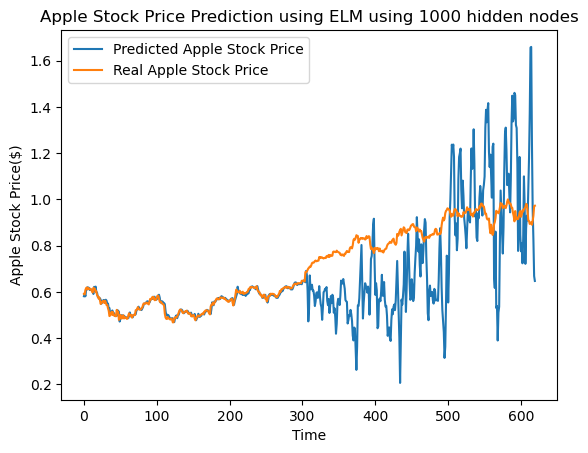

In [312]:
plt.plot(prediction, label = 'Predicted Apple Stock Price', linewidth = 1.5)
plt.plot(y_test, label = 'Real Apple Stock Price', linewidth = 1.5)
plt.title("Apple Stock Price Prediction using ELM using 1000 hidden nodes")
plt.xlabel('Time')
plt.ylabel('Apple Stock Price($)')
plt.legend()
plt.show()

# Grays Correlation Coefficient

            Open        High         Low       Close     Volume        MA20  \
0       6.999730    7.228929    6.987158    7.228929  201808600         NaN   
1       7.265678    7.347880    7.204753    7.250205  154900900         NaN   
2       7.236664    7.243433    7.132219    7.193145  112355600         NaN   
3       7.277282    7.417508    7.209586    7.378825  176114400         NaN   
4       7.420411    7.465863    7.324670    7.354649  168760200         NaN   
...          ...         ...         ...         ...        ...         ...   
3100  164.000000  164.330002  160.630005  162.320007   35655800  170.063001   
3101  162.130005  167.259995  161.839996  165.259995   42427400  169.992001   
3102  166.410004  169.199997  165.270004  169.100006   53569400  170.027502   
3103  175.229996  177.750000  173.800003  176.570007   66539400  170.275502   
3104  175.880005  177.500000  174.440002  176.889999   33855800  170.480002   

            MA80  Buy  Sell       Upper       Lower

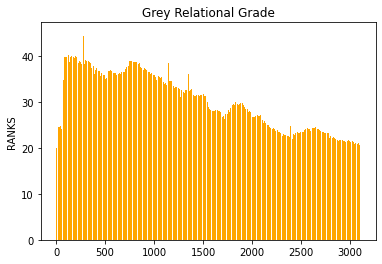

In [17]:
csv=df.drop(['Date'],axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
print(csv)
ColsSize = 1
ListsEbe = []
for i in range(ColsSize):
    Ebeis = "Close"
    ListsEbe.append(Ebeis)
X = csv.drop(ListsEbe,axis=1)
Adding = []
for z in range(len(ListsEbe)):
    Max = csv[ListsEbe[z]].max()
    Min = csv[ListsEbe[z]].min()
    Fark = Max - Min
    Normalized = ((csv[ListsEbe[z]] - Min) / Fark)
    Adding.append(1 - Normalized)

EbeiDataFrame = pd.DataFrame(Adding)

print(EbeiDataFrame)
print("hello")


Scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(Scaled)
df.to_excel('ScaledData.xlsx')

"""
Calculate Grey Relational Coefficient
"""
List = []
for p in range(len(ListsEbe)):
    List.append(p)
EbeiDataFrameT = EbeiDataFrame.T
EbeiDataFrameT.columns = List 
Renamed = EbeiDataFrameT
countEb = len(EbeiDataFrameT.columns)
Sequence_list2 = []
DeltaMin= 0
DeltaMax = 1
Theta = 0.5
cap = []
for i in range(countEb):
    df_Drop_z = Renamed[i]
    df_Drop_z_Max = df_Drop_z.max()
    df_Drop_z_Min = df_Drop_z.min()
    Standart_Deviation_Sequence = []
    Standart_Deviation_b = df_Drop_z_Max - df_Drop_z
    pow_Total = DeltaMin + Theta
    inline_Total = (Theta * df_Drop_z_Max) + df_Drop_z
    GreyRelationalCoefficient = (((Theta * df_Drop_z_Max) + df_Drop_z_Min) / (df_Drop_z + (Theta * df_Drop_z_Max)))
  
    Sequence_list2.append(GreyRelationalCoefficient)
DataFrameCoefficient3 = pd.DataFrame(Sequence_list2)
DataFrameTransposed4 = DataFrameCoefficient3.T 




count = len(df.columns)
count2 = count
Sequence_list = []
DeltaMin= 0
DeltaMax = 1
Theta = 0.5
cap = []
for i in range(count):
    df_Drop_a = df[i]
    df_Drop_a_Max = df_Drop_a.max()
    df_Drop_a_Min = df_Drop_a.min()
    Standart_Deviation_Sequence = []
    Standart_Deviation_b = df_Drop_a_Max - df_Drop_a
    pow_Total = DeltaMin + Theta
    inline_Total = (Theta * df_Drop_a_Max) + df_Drop_a
    GreyRelationalCoefficient = (((Theta * df_Drop_a_Max) + df_Drop_a_Min) / (df_Drop_a + (Theta * df_Drop_a_Max)))
  
    Sequence_list.append(GreyRelationalCoefficient)
DataFrameCoefficient = pd.DataFrame(Sequence_list)
DataFrameTransposed = DataFrameCoefficient.T 
DataFrameTransposed2 = DataFrameCoefficient.T 
for v in range(len(Adding)):
    DataFrameTransposed[count2] = DataFrameTransposed4[v]
    count2 = count2 + 1

DataFrameTransposed.to_excel('GrayRelationalAnalysisCoefficient.xlsx')
print("-------------------------------------------------------------------------------------")
print("The maximum normalization columns you select are added to the bottom of the list. You should pay attention to this when giving your column weights.")
print("-------------------------------------------------------------------------------------")
print(DataFrameTransposed)
CountFor = len(DataFrameTransposed.columns)
Total = np.zeros((CountFor,1))
Totals = 0
for x in range(CountFor):
    w = float(input("Give Weights for Each Columns:"))
    DataFrameColumnSums = DataFrameTransposed[x]
    Columns = DataFrameColumnSums * w 
    DataFrameTransposed[x] = Columns
DataFrameTransposed['RANK'] = DataFrameTransposed.sum(axis=1)
DataFrameTransposed.to_excel('GreyRelationalRank.xlsx')
print(DataFrameTransposed)

""" Plotting GRA RANK  """

Counting = len(DataFrameTransposed.index)
y_pos = np.arange(Counting)
performance = DataFrameTransposed['RANK']
plt.bar(y_pos,performance, color='orange' )
plt.ylabel('RANKS')
plt.title('Grey Relational Grade')
plt.savefig('GRA')
plt.show()

## Oscillation box

### Upper and lower boundary using the concept of Bollinger Bands

Typical Values used are : 20 day mean and bands at 2 standard deviation

C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

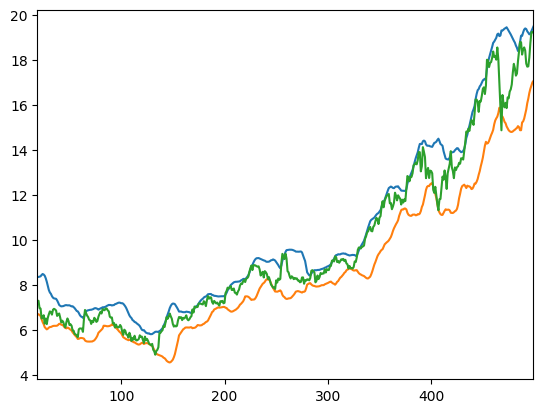

In [442]:
df_osb = df.iloc[:500]
df_osb["MA20"] = df_osb.Close.rolling(window = 20).mean()
df_osb["std20"] = df_osb.Close.rolling(window = 20).std()
df_osb.dropna(inplace=True)


df_osb["Upper limit"] = df_osb["MA20"] + 2*df_osb["std20"]
df_osb["Lower limit"] = df_osb["MA20"] - 2*df_osb["std20"]

df_osb["Upper limit"].plot()
df_osb["Lower limit"].plot()
df_osb.Close.plot()

In [443]:
df_osb

,Date,Open,High,Low,Close,Volume,MA20,std20,Upper limit,Lower limit
19,1/31/2006,7.301461,7.382695,7.132221,7.302428,228385500,7.524856,0.415232,8.355319,6.694392
20,2/1/2006,7.248270,7.394299,7.218290,7.293722,130296600,7.528095,0.413048,8.354192,6.701998
21,2/2/2006,7.262777,7.287921,6.967816,6.972652,176830500,7.514218,0.427293,8.368804,6.659631
22,2/3/2006,6.986192,7.039381,6.870142,6.948476,173030900,7.501984,0.440275,8.382534,6.621435
23,2/6/2006,6.964914,7.012301,6.454296,6.508452,412941900,7.458466,0.492953,8.444372,6.472559
...,...,...,...,...,...,...,...,...,...,...
495,12/20/2007,17.932574,18.164674,17.729488,18.104715,193514300,17.830938,0.650541,19.132020,16.529856
496,12/21/2007,18.386141,18.752665,18.363898,18.752665,248490200,17.939106,0.611933,19.162973,16.715239
497,12/24/2007,18.860978,19.276822,18.837768,19.225567,120050700,18.066084,0.601623,19.269330,16.862838
498,12/26/2007,19.245876,19.434456,19.034086,19.240074,175933100,18.182811,0.590982,19.364775,17.000846


In [461]:
def splitdata(data, timeperiod):
    
    num = len(data["Close"])//timeperiod+1 
    chunks = list()
    
    for i in range(num):
        chunks.append(data.Close[ i*timeperiod : (i+1)*timeperiod ])
    return chunks


In [462]:
def osc_box(list, plotname):
    print(len(list[1]))
    
    for i in range(len(list)):
        mx = max(list[i])
        mn = min(list[i])
        
        plotname.add_patch(
        patches.Rectangle(
            xy=(list[i].index[0], mn),  # point of origin.
                width = len(list[i]), 
                height = mx-mn,
                linewidth=1,
                color='red',
                fill=False
            )
        )
    

100


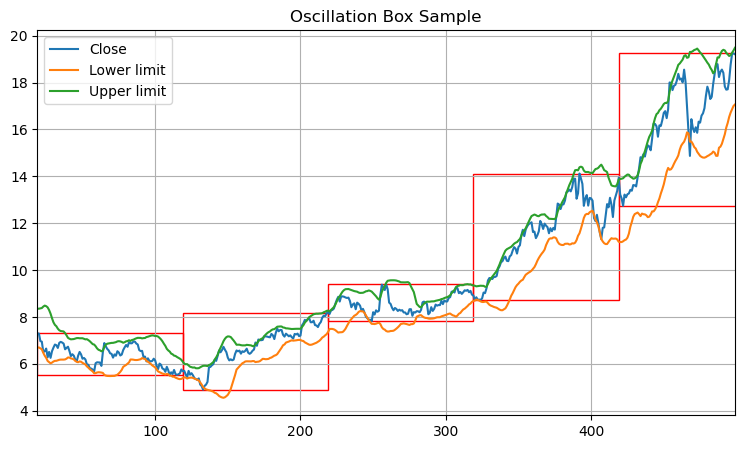

In [465]:
# Create the plot
currentAxis=pd.concat([df_osb.Close,df_osb["Lower limit"],df_osb["Upper limit"]],axis=1).plot(figsize=(9,5),grid=True)
plt.title("Oscillation Box Sample")

osc_box(splitdata(df_osb , 100),currentAxis)

## Buy Sell 

In [12]:
df_bns = df['Close']

MA20 = df_bns.rolling(window=20).mean()
MA20
MA80 = df_bns.rolling(window=80).mean()
MA80

def buy_sell(data):    
    PriceBuy = []
    PriceSell = []
    flag = -1
    for i in range(0,len(data)):
    #if sma30 > sma100  then buy else sell
        if data['MA20'][i] > data['MA80'][i]:
            if flag != 1:
                PriceBuy.append(data['Close'][i])
                PriceSell.append(np.nan)
                flag = 1
            else:
                PriceBuy.append(np.nan)
                PriceSell.append(np.nan)
        #print('Buy')
        elif data['MA20'][i] < data['MA80'][i]:
            if flag != 0:
                PriceSell.append(data['Close'][i])
                PriceBuy.append(np.nan)
                flag = 0
            else:
                PriceBuy.append(np.nan)
                PriceSell.append(np.nan)
        #print('sell')
        else: #Handling nan values
            PriceBuy.append(np.nan)
            PriceSell.append(np.nan)
  
    return (PriceBuy, PriceSell)

In [13]:
data = df

In [14]:
MA20=pd.DataFrame(MA20)
data['MA20']=MA20['Close']
MA80=pd.DataFrame(MA80)
data['MA80']=MA80['Close']
data

,Date,Open,High,Low,Close,Volume,MA20,MA80
0,1/3/2006,6.999730,7.228929,6.987158,7.228929,201808600,NaN,NaN
1,1/4/2006,7.265678,7.347880,7.204753,7.250205,154900900,NaN,NaN
2,1/5/2006,7.236664,7.243433,7.132219,7.193145,112355600,NaN,NaN
3,1/6/2006,7.277282,7.417508,7.209586,7.378825,176114400,NaN,NaN
4,1/9/2006,7.420411,7.465863,7.324670,7.354649,168760200,NaN,NaN
...,...,...,...,...,...,...,...,...
3100,4/27/2018,164.000000,164.330002,160.630005,162.320007,35655800,170.063001,171.432794
3101,4/30/2018,162.130005,167.259995,161.839996,165.259995,42427400,169.992001,171.354411
3102,5/1/2018,166.410004,169.199997,165.270004,169.100006,53569400,170.027502,171.314069
3103,5/2/2018,175.229996,177.750000,173.800003,176.570007,66539400,170.275502,171.342576


In [15]:
x = buy_sell(data)
data['Buy'] = x[0]
data['Sell'] = x[1]

M = data.Close.rolling(window = 60).mean()
S = data.Close.rolling(window = 60).std()

data['Upper']= M + (2 * S) 
data['Lower']= M - (2 * S)


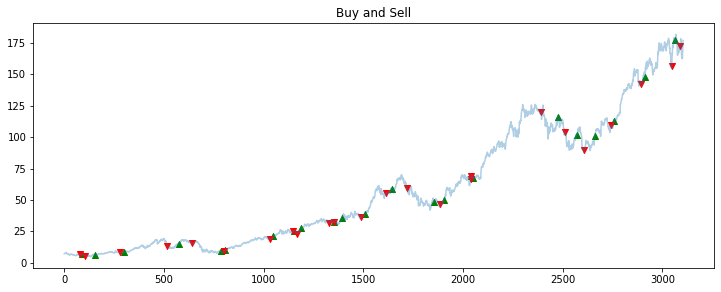

In [16]:
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(data.index, data['Buy'], color = 'green', label='Buy', marker = '^', alpha = 1)
plt.scatter(data.index, data['Sell'], color = 'red', label='Sell', marker = 'v', alpha = 1)
plt.plot( data["Close"], alpha = 0.35)
plt.title("Buy and Sell")
plt.show()